In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
angle = 30*np.pi/180

In [4]:
img = cv2.imread('IMG_0129.jpeg',0)

In [5]:
h,w = img.shape[0],img.shape[1]
newW = int(w*abs(np.cos(angle)) + h*abs(np.sin(angle)))+1
newH = int(w*abs(np.sin(angle)) + h*abs(np.cos(angle)))+1

In [6]:
newimg1 = np.zeros((newH,newW,3),dtype = int)
newimg2 =  np.zeros((newH,newW,3),dtype = int)
newimg3 =  np.zeros((newH,newW,3),dtype = int)

In [7]:
#scr -> des
trans1 = np.array([[1,0,0],[0,-1,0],[-0.5*w,0.5*h,1]])
trans1 = trans1.dot(np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]]))
trans1 = trans1.dot(np.array([[1,0,0],[0,-1,0],[0.5*newW,0.5*newH,1]]))

In [8]:
#des -> src
trans2 = np.array([[1,0,0],[0,-1,0],[-0.5*newW,0.5*newH,1]])
trans2 = trans2.dot(np.array([[np.cos(angle),np.sin(angle),0],[-np.sin(angle),np.cos(angle),0],[0,0,1]]))
trans2 = trans2.dot(np.array([[1,0,0],[0,-1,0],[0.5*w,0.5*h,1]]))

In [9]:
for x in range(w):
    for y in range(h):
        newPos = np.array([x,y,1]).dot(trans1)
        newimg1[int(newPos[1])][int(newPos[0])] = img[y][x]

In [10]:
for x in range(newW):
    for y in range(newH):
        srcPos = np.array([x,y,1]).dot(trans2)
        if srcPos[0] >= 0 and srcPos[0] < w and srcPos[1] >= 0 and srcPos[1] < h:
            newimg2[y][x] = img[int(srcPos[1])][int(srcPos[0])]
            # 双线性内插
            bix,biy = int(srcPos[0]),int(srcPos[1]) # 取左上角坐标
            # 避免最后一行溢出
            if bix < w-1 and biy < h-1:
                # 沿 X 方向线性内插
                rgbX1 = img[biy][bix] + (img[biy][bix+1] - img[biy][bix])*(srcPos[0]-bix)
                rgbX2 = img[biy+1][bix] + (img[biy+1][bix+1] - img[biy+1][bix])*(srcPos[0]-bix)
                # 沿 Y  方向内插
                rgb = rgbX1 + (rgbX2-rgbX1)*(srcPos[1]-biy)
                newimg3[y][x] = rgb

/Users/wangzhaodong/code/anaconda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
/Users/wangzhaodong/code/anaconda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


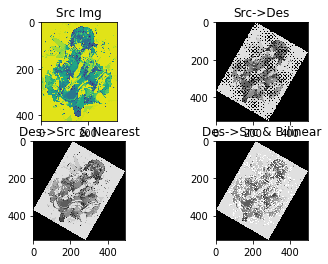

In [11]:
sub = plt.subplot(2,2,1)
sub.set_title("Src Img")
plt.imshow(img)
sub = plt.subplot(2,2,2)
sub.set_title("Src->Des")
plt.imshow(newimg1)
sub = plt.subplot(2,2,3)
sub.set_title("Nearest")
plt.imshow(newimg2)
sub = plt.subplot(2,2,4)
sub.set_title("Bilinear")
plt.imshow(newimg3)
plt.show()

In [12]:
cv2.imwrite('IMG_0129_rotate1.jpeg', newimg2, [cv2.IMWRITE_JPEG_QUALITY,100])
cv2.imwrite('IMG_0129_rotate12.jpeg', newimg3, [cv2.IMWRITE_JPEG_QUALITY,100])

True